In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. INGESTA DE DATOS (Simulamos un archivo 'sucio' de la clínica)

In [23]:
data = {
    'fecha_cita': [
        '2024-01-15', '2024-01-15', '15/01/2024', '2024-01-16', '2024-01-16', 
        None, '18-01-2024', '2024/01/19', '2024-01-20', '2024-01-20',
        '22/01/2024', '2024-01-23', None, '2024-01-25', '26/01/2024'
    ],
    'especialidad': [
        'Ginecología', 'Pediatría', 'Ginecología', 'Medicina General', 'Ginecología', 
        'Pediatría', 'Cardiología', 'Medicina General', 'Dermatología', 'Ginecología',
        'Pediatría', 'Cardiología', 'Medicina General', 'Dermatología', 'Ginecología'
    ],
    'paciente_edad': [
        25, 8, 30, 45, 28, 
        np.nan, 60, 35, 22, 31, 
        10, 55, np.nan, 19, 29
    ], 
    'estado_cita': [
        'Atendido', 'Atendido', 'Cancelado', 'Atendido', 'Atendido', 
        'Programado', 'Cancelado', 'Atendido', 'No Asistió', 'Atendido',
        'Atendido', 'Cancelado', 'Atendido', 'Atendido', 'Cancelado'
    ]
}

df = pd.DataFrame(data)
print(f"Total de registros cargados: {len(df)}")
display(df)

Total de registros cargados: 15


,fecha_cita,especialidad,paciente_edad,estado_cita
0,2024-01-15,Ginecología,25.0,Atendido
1,2024-01-15,Pediatría,8.0,Atendido
2,15/01/2024,Ginecología,30.0,Cancelado
3,2024-01-16,Medicina General,45.0,Atendido
4,2024-01-16,Ginecología,28.0,Atendido
5,None,Pediatría,NaN,Programado
6,18-01-2024,Cardiología,60.0,Cancelado
7,2024/01/19,Medicina General,35.0,Atendido
8,2024-01-20,Dermatología,22.0,No Asistió
9,2024-01-20,Ginecología,31.0,Atendido


## 2. LIMPIEZA Y TRANSFORMACIÓN (ETL) - ¡Aquí está tu valor!

In [24]:
# A. Fechas (Usando format='mixed' para tu corrección)
try:
    df['fecha_cita'] = pd.to_datetime(df['fecha_cita'], errors='coerce', dayfirst=True, format='mixed')
except ValueError:
    df['fecha_cita'] = pd.to_datetime(df['fecha_cita'], errors='coerce', dayfirst=True)

# Llenar fechas vacías con la fecha de hoy
df['fecha_cita'] = df['fecha_cita'].fillna(pd.Timestamp('today'))

# B. Edades (Llenar con el promedio)
promedio_edad = df['paciente_edad'].mean()
df['paciente_edad'] = df['paciente_edad'].fillna(promedio_edad).round(0) # Redondeamos a enteros

print("\n--- Muestra de Datos Limpios ---")
display(df)


--- Muestra de Datos Limpios ---


,fecha_cita,especialidad,paciente_edad,estado_cita
0,2024-01-15 00:00:00.000000,Ginecología,25.0,Atendido
1,2024-01-15 00:00:00.000000,Pediatría,8.0,Atendido
2,2024-01-15 00:00:00.000000,Ginecología,30.0,Cancelado
3,2024-01-16 00:00:00.000000,Medicina General,45.0,Atendido
4,2024-01-16 00:00:00.000000,Ginecología,28.0,Atendido
5,2026-01-05 18:25:20.982592,Pediatría,31.0,Programado
6,2024-01-18 00:00:00.000000,Cardiología,60.0,Cancelado
7,2024-01-19 00:00:00.000000,Medicina General,35.0,Atendido
8,2024-01-20 00:00:00.000000,Dermatología,22.0,No Asistió
9,2024-01-20 00:00:00.000000,Ginecología,31.0,Atendido


## 3. ANÁLISIS DE NEGOCIO (KPIs)

In [25]:
# A. Pregunta de negocio: ¿Cuál es la especialidad más demandada?
conteo_especialidad = df['especialidad'].value_counts()

# B. Calcular totales por estado
conteo_estados = df['estado_cita'].value_counts()

# C. Calcular el Porcentaje de Cancelaciones (Tu solicitud)
total_citas = len(df)
total_canceladas = len(df[df['estado_cita'] == 'Cancelado'])

# Fórmula: (Parte / Total) * 100
porcentaje_cancelacion = (total_canceladas / total_citas) * 100

print(f"\nMetric Clave (KPI):")
print(f"Tasa de Cancelación: {porcentaje_cancelacion:.2f}%")


Metric Clave (KPI):
Tasa de Cancelación: 26.67%


## 4. VISUALIZACIÓN (Matplotlib)

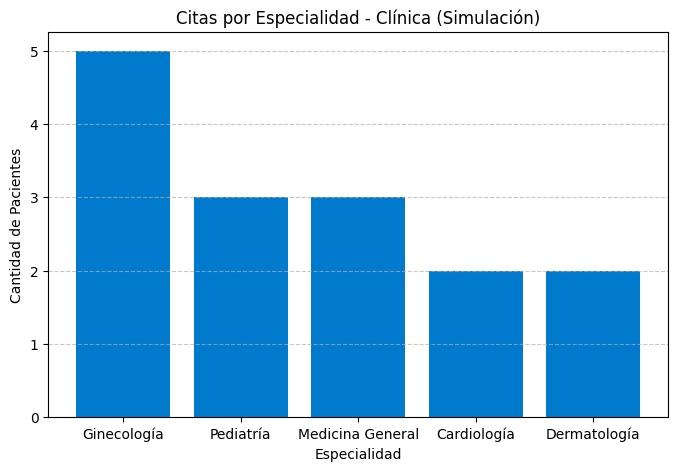

In [26]:
plt.figure(figsize=(8, 5))
plt.bar(conteo_especialidad.index, conteo_especialidad.values, color='#007acc')

plt.title('Citas por Especialidad - Clínica (Simulación)')
plt.xlabel('Especialidad')
plt.ylabel('Cantidad de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

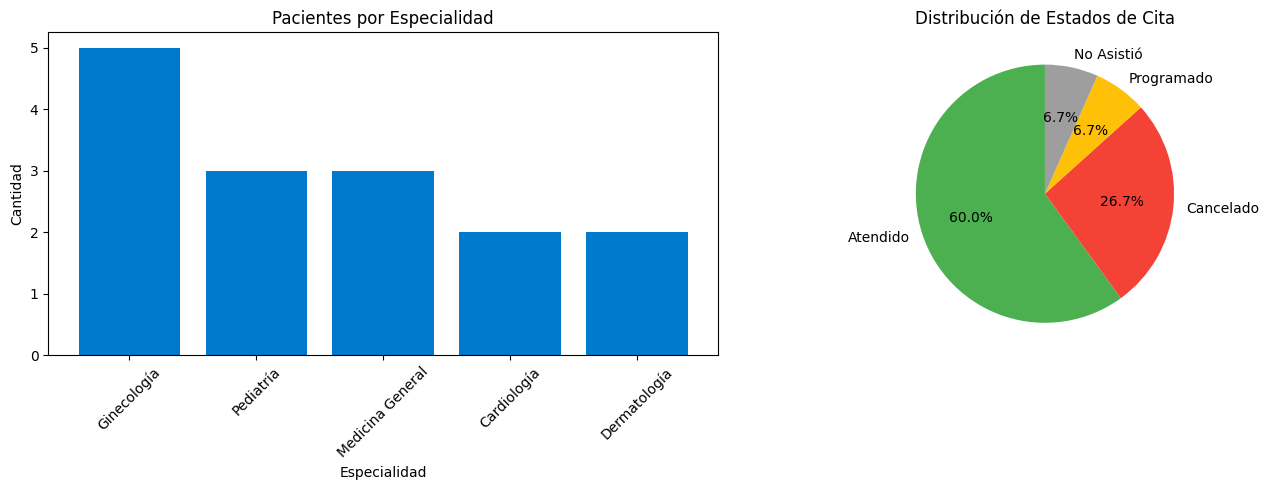

In [27]:
# Vamos a hacer 2 gráficos en una sola figura (Subplots)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Barras por Especialidad
conteo_especialidad = df['especialidad'].value_counts()
ax1.bar(conteo_especialidad.index, conteo_especialidad.values, color='#007acc')
ax1.set_title('Pacientes por Especialidad')
ax1.set_xlabel('Especialidad')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=45) # Rotar nombres si son largos

# Gráfico 2: Pastel (Pie Chart) de Estados de Cita
colores = ['#4CAF50', '#F44336', '#FFC107', '#9E9E9E'] # Verde, Rojo, Amarillo, Gris
ax2.pie(conteo_estados, labels=conteo_estados.index, autopct='%1.1f%%', colors=colores, startangle=90)
ax2.set_title('Distribución de Estados de Cita')

plt.tight_layout()
plt.show()